In [98]:
## STANDARD IMPORTS
import os
import time
import h5py
import numpy as np
import numpy.ma as ma
import pandas as pd
import json

!pip install ../../../h5flow
import h5flow
from h5flow.data import dereference

## 3D PLOTTING
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, colors
import matplotlib.patches as mpatches
from matplotlib.colors import BoundaryNorm

Processing /Users/james/DUNE/h5flow
  Preparing metadata (setup.py) ... done
  Created wheel for h5flow: filename=h5flow-0.2.4-py3-none-any.whl size=31486 sha256=d9df7348cbd24bde7dd0477cff19af301f3055df9365db45a0662ad75d3ddb3e
  Stored in directory: /private/var/folders/rc/blk_p25x629bs2hm6s03qd7r0000gp/T/pip-ephem-wheel-cache-hct8avey/wheels/24/88/52/69f8c19ba5cdb192c9c8611f03e4d3b4e2b4c27d2131bc4e20
Successfully built h5flow
  Attempting uninstall: h5flow
    Found existing installation: h5flow 0.2.4
    Uninstalling h5flow-0.2.4:
      Successfully uninstalled h5flow-0.2.4


In [101]:

      # get event in data
      light_data = f['light/wvfm/data']['samples'][i_evt_lrs]
      wvfm = np.sum(light_data, axis=(0,1))

      # get segment to vertex matching
      mc_seg_data = f["mc_truth/segments/data"]
      spill_id = np.unique(mc_seg_data["event_id"])[i_evt_lrs]
      ev_seg_ids = np.where(mc_seg_data["event_id"]==spill_id)[0]
      ev_truth_light = f["mc_truth/light/data"][ev_seg_ids]

      # get segment times
      segment_times = mc_seg_data["t0_start"][ev_seg_ids]
      segment_idxs = segment_times%1.2e6*(1000.0/16.0)+100

      # get segment vertex_id
      int_seg_ids = mc_seg_data["vertex_id"][ev_seg_ids]
      # for each unique vertex_id, get the segment with the min time
      first_segment_idxs = []
      for i in np.unique(int_seg_ids):
        idx = np.where(int_seg_ids==i)[0]
        first_segment_idx = np.argmin(segment_times[idx])
        first_segment_idxs.append(segment_idxs[idx][first_segment_idx])

      # get interaction times
      mc_int_data = f["mc_truth/interactions/data"]
      interaction_idx = np.where(mc_int_data["event_id"]==spill_id)[0]
      int_times = mc_int_data[interaction_idx]["t_vert"]%1.2e6*(1000.0/16.0)+100

KeyError: 'Unable to synchronously open object (component not found)'

In [71]:
#dirname = 'data_processed_mpd_run_hvramp_rctl_105_p350.FLOW_TrapType_evts_all'
dirname = 'mc_processed_MiniRun5_1E19_RHC.flow.0000000.FLOW_TrapType_evts_all'
spes_filename = dirname+'/spes_evt.npz'
noise_filename = dirname+'/noise_evt.npz'
config_filename = dirname+'/config.json'
hits_filename = dirname+'/hits_evt.npz'
hits_config_filename = dirname+'/hits_config.json'
true_hits_filename = dirname+'/true_nu_int.csv'

# check if true hits file exists
if os.path.exists(true_hits_filename):
    true_hits = pd.read_csv(true_hits_filename)
    print(true_hits.head())

# print configuration and hit configuration
with open(config_filename) as json_file:
    config = json.load(json_file)
    print(json.dumps(config, indent=4))
with open(hits_config_filename) as json_file:
    hits_config = json.load(json_file)
    print(json.dumps(hits_config, indent=4))

   file_idx  event_id  tpc_num  start_time  start_time_idx         v_x  \
0       0.0       1.0     -1.0    0.760375            48.0  575.664917   
1       0.0       1.0      1.0    6.066433           379.0   15.857863   
2       0.0       2.0     -1.0    8.164659           510.0 -342.153961   
3       0.0       2.0     -1.0    9.065336           567.0   98.637550   
4       0.0       3.0     -1.0    1.235837            77.0 -122.665771   

          v_y          v_z  
0  110.570198 -1463.731812  
1   43.832363   -36.580154  
2  702.277405 -2859.724609  
3 -144.412003     4.855194  
4  708.711792    -5.943815  
{
    "timestamp": "2025-01-22 11:41:57.127010",
    "filename": "../hdf5s/MiniRun5_1E19_RHC.flow.0000000.FLOW.hdf5",
    "is_data": false,
    "save_truth": true,
    "summed": "TrapType",
    "max_evts": null,
    "calib_filename": "calibration/mc_calib.csv",
    "geom_filename": "geom_files/light_module_desc-4.0.0.csv",
    "channel_status_filename": "channel_status/channel_s

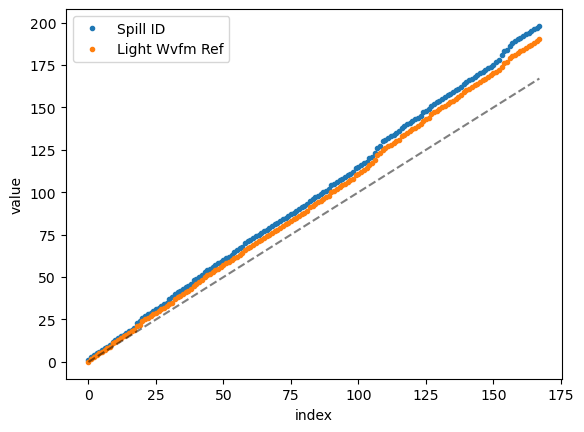

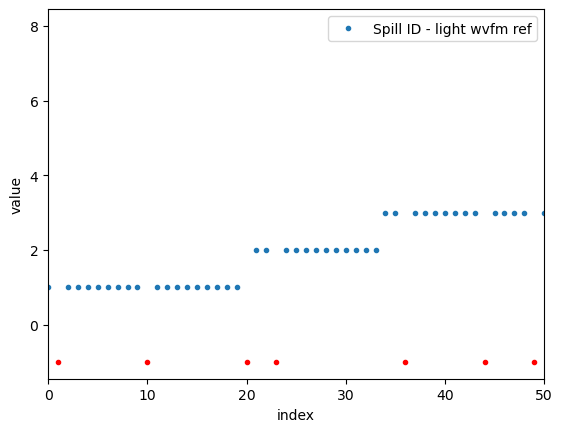

In [72]:
corrections_file = '../spill_event_light.csv'
corrections = pd.read_csv(corrections_file)
spill_id = corrections['spill_id']
light_wvfm_ref = corrections['light_wvfm_ref']

indices = np.arange(len(light_wvfm_ref))
# plot spill id vs light wvfm ref
plt.plot(spill_id, label='Spill ID', marker='.', linestyle='None')
plt.plot(light_wvfm_ref, label='Light Wvfm Ref', marker='.', linestyle='None')
plt.plot(indices, color='k', linestyle='--', alpha=0.5)
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

# plot subtracting y=x
diff = spill_id-light_wvfm_ref
plt.plot(light_wvfm_ref, diff, label='Spill ID - light wvfm ref', marker='.', linestyle='None')
# plot a point at y=-1 for each missing light wvfm ref
missing = np.where(light_wvfm_ref.diff() != 1)[0]
plt.plot(light_wvfm_ref[missing] - 1, -1*np.ones(len(missing)), marker='.', linestyle='None', color='r')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.xlim(0, 50)
plt.show()




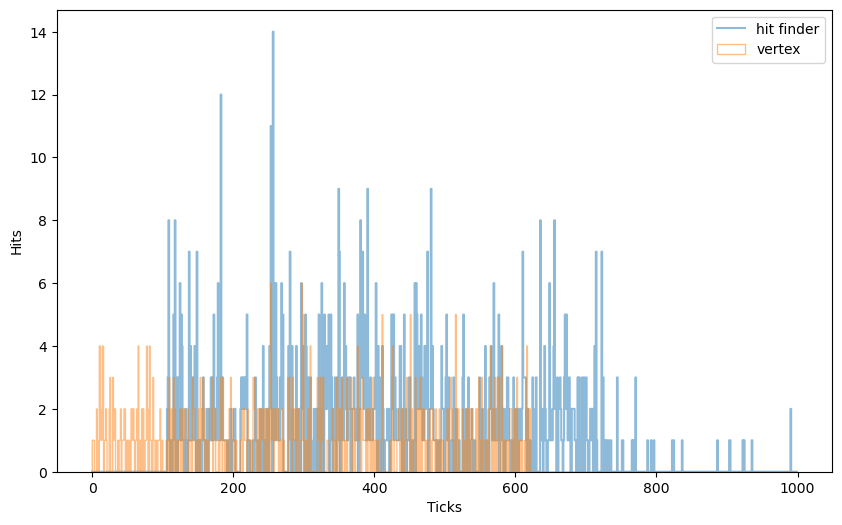

In [73]:
# load true hits
true_hits = pd.read_csv(true_hits_filename)
true_hit_idxs = true_hits['start_time_idx'].values

# load ticks histogram of all hits
hits_file = np.load(hits_filename)
hits_arr = hits_file['arr_0']
flat_hits = np.sum(hits_arr, axis=(0,1))

# plot ticks histogram of all hits
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.step(range(len(flat_hits)), flat_hits, label='hit finder', alpha=0.5)
ax.hist(true_hit_idxs, bins=range(len(flat_hits)), histtype='step', label='vertex', alpha=0.5)
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.show()




In [74]:
import scipy.stats
def clopper_pearson_interval(k, n, alpha=0.6827):
    alpha = 1 - alpha
    lo = 0.5 * scipy.stats.beta.ppf(alpha / 2, k, n - k + 1)
    hi = 1 - 0.5 * scipy.stats.beta.ppf(alpha / 2, k + 1, n - k)
    return lo, hi

In [75]:
def plot_waveform(wvfm, time_bins, height, mad, n_mad_factor, dynamic_threshold, hit_where, n_noise_factor, i_evt_lrs, i_mask, true_hits=None):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
  # set a title
  fig.suptitle(f'Event {i_evt_lrs}, TPC {i_mask // 2}, TrapType {i_mask % 2}')

  # Linear plot
  ax1.plot(time_bins, wvfm)
  ax1.axhspan(-mad, mad, color='k', alpha=0.1, label='MAD')
  ax1.axhline(mad*n_mad_factor, color='k', linestyle='--', alpha=0.5, label='MAD threshold')
  ax1.axhspan(-height, height, color='r', alpha=0.1, label='Masked samples Stddev')
  ax1.axhline(n_noise_factor*height, color='r', linestyle='--', alpha=0.5, label='Noise threshold')
  ax1.plot(time_bins, dynamic_threshold, color='g', alpha=0.5)
  ax1.plot(hit_where * 16/1000, wvfm[hit_where], 'x', color='red')
  ax1.axhline(0, color='k', linestyle=':', alpha=0.5)
  for hit_idx in true_hits:
    ax1.axvline(hit_idx * 16/1000, color='purple', linestyle=':', alpha=0.5, label='True hits')
  ax1.set_xlabel('Time (us)')
  ax1.set_ylabel('SPEs')
  ax1.legend()

  # Logarithmic plot
  ax2.plot(time_bins, wvfm + 1)
  ax2.axhspan(0, mad + 1, color='k', alpha=0.1)
  ax2.axhline(mad*n_mad_factor + 1, color='k', linestyle='--', alpha=0.5)
  ax2.axhspan(0, height + 1, color='r', alpha=0.1)
  ax2.axhline(n_noise_factor*height+1, color='r', linestyle='--', alpha=0.5)
  ax2.plot(time_bins, dynamic_threshold + 1, color='g', alpha=0.5)
  ax2.plot(hit_where * 16/1000, wvfm[hit_where] + 1, 'x', color='red')
  ax2.axhline(1, color='k', linestyle=':', alpha=0.5)
  for hit_idx in true_hits:
    ax2.axvline(hit_idx * 16/1000, color='purple', linestyle=':', alpha=0.5)
  ax2.set_yscale('log')
  ax2.set_xlabel('Time (us)')
  ax2.set_ylim(0.1, dynamic_threshold.max()*1.1)

  plt.tight_layout()
  plt.show()

In [76]:
from scipy.ndimage import uniform_filter1d

# load hit finder config
with open(hits_config_filename) as json_file:
    hits_config = json.load(json_file)
n_noise_factor = hits_config['n_noise_factor']
n_bins_rolled = hits_config['n_bins_rolled']
n_sqrt_rt_factor = hits_config['n_sqrt_rt_factor']
pe_weight = hits_config['pe_weight']


# loading events
time_bins = np.linspace(0, 16, 1000)

# wvfms
summed_wvfms_file = np.load(spes_filename)
summed_wvfms = np.array(summed_wvfms_file['arr_0'])

# noise thresholds
heights_file = np.load(noise_filename)
heights = np.array(heights_file['arr_0'])

# loading hits
hits_file = np.load(hits_filename)
hits = np.array(hits_file['arr_0'])

# find first event with hits != -1
i_evt_lrs = 0 # event number
i_tpc = np.array([0, 1, 2, 3])
i_mask = 2*i_tpc + 1 # 2 * TPC + TrapType
print(i_mask)

# where does light wvfm ref == i_evt_lrs
#i_evt_lwr = np.where(light_wvfm_ref==i_evt_lrs)[0][0]
#print(f'Event {i_evt_lrs} has light wvfm ref {i_evt_lwr}')
i_evt_lwr = light_wvfm_ref[i_evt_lrs]

# find the corresponding spill_id for light wvfm ref = i_evt_lrs
spill_id_lwr = spill_id[i_evt_lrs]
print(f'Event {i_evt_lrs} has spill_id {spill_id_lwr}')

#true_hits_tpc = true_hits[(true_hits['tpc_num'] == i_tpc) & (true_hits['event_id'] == spill_id_lwr)]
true_hits_tpc = true_hits[(true_hits['event_id'] == spill_id_lwr)]
true_hits_idx = true_hits_tpc['start_time_idx'].values
print(true_hits)

for i in range(4):

    # get wvfm, threshold, and hits for the event
    wvfm = summed_wvfms[i_evt_lrs,i_mask]
    median = np.median(wvfm)
    mad = np.median(np.abs(wvfm - median))
    mad_threshold = 5*mad
    wvfm_rolled = np.roll(wvfm, n_bins_rolled)
    rolling_average = uniform_filter1d(wvfm_rolled, size=n_bins_rolled)
    sqrt_rolling_average = np.sqrt(np.abs(rolling_average) * pe_weight**2)
    dynamic_threshold = rolling_average + n_sqrt_rt_factor*sqrt_rolling_average
    height = heights[i_evt_lrs,i_mask]
    hit = hits[i_evt_lrs,i_mask]
    hit_where = np.where(hit)[0]
    print(hit_where)

    #plot_waveform(wvfm, time_bins, height, mad, 5.0, dynamic_threshold, hit_where, n_noise_factor, i_evt_lrs, i_mask, true_hits_idx)


[1 3 5 7]
Event 0 has spill_id 1
     file_idx  event_id  tpc_num  start_time  start_time_idx         v_x  \
0         0.0       1.0     -1.0    0.760375            48.0  575.664917   
1         0.0       1.0      1.0    6.066433           379.0   15.857863   
2         0.0       2.0     -1.0    8.164659           510.0 -342.153961   
3         0.0       2.0     -1.0    9.065336           567.0   98.637550   
4         0.0       3.0     -1.0    1.235837            77.0 -122.665771   
..        ...       ...      ...         ...             ...         ...   
611       0.0     196.0     -1.0    4.538300           284.0 -122.864120   
612       0.0     197.0     -1.0    9.863215           616.0 -118.984421   
613       0.0     198.0     -1.0    0.190897            12.0 -131.651993   
614       0.0     198.0     -1.0    7.404943           463.0  -57.345200   
615       0.0     198.0     -1.0    9.122297           570.0  439.340698   

            v_y          v_z  
0    110.570198 -1463.7

In [77]:
def plot_all_tpc_waveform(wvfms, time_bins, hit_where, i_evt_lrs, i_mask, true_hits=None):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
  # set a title
  fig.suptitle(f'Event {i_evt_lrs}, TrapType {i_mask % 2}')

  # Linear plot
  for i,wvfm in enumerate(wvfms):
    ax1.plot(time_bins, wvfm, label=f'TPC {i}')
    label = 'Rec hits' if i == 0 else None
    ax1.plot(hit_where[i] * 16/1000, wvfm[hit_where[i]], 'x', color='k', label=label)
  for hit_idx in true_hits:
    label = 'True hits' if i == 0 else None
    ax1.axvline(hit_idx * 16/1000, color='purple', linestyle=':', alpha=0.5, label=label)
  ax1.axhline(0, color='k', linestyle=':', alpha=0.5)
  ax1.set_xlabel('Time (us)')
  ax1.set_ylabel('SPEs')
  ax1.legend()

  # Logarithmic plot
  for i,wvfm in enumerate(wvfms):
    ax2.plot(time_bins, wvfm + 1, label=f'TPC {i}')
    label = 'Rec hits' if i == 0 else None
    ax2.plot(hit_where[i] * 16/1000, wvfm[hit_where[i]] + 1, 'x', color='k', label=label)
  for hit_idx in true_hits:
    label = 'True hits' if i == 0 else None
    ax2.axvline(hit_idx * 16/1000, color='purple', linestyle=':', alpha=0.5, label=label)
  ax2.axhline(1, color='k', linestyle=':', alpha=0.5)
  ax2.set_yscale('log')
  ax2.set_xlabel('Time (us)')
  #ax2.set_ylim(0.1, wvfm.max()*1.1)

  plt.tight_layout()
  plt.show()

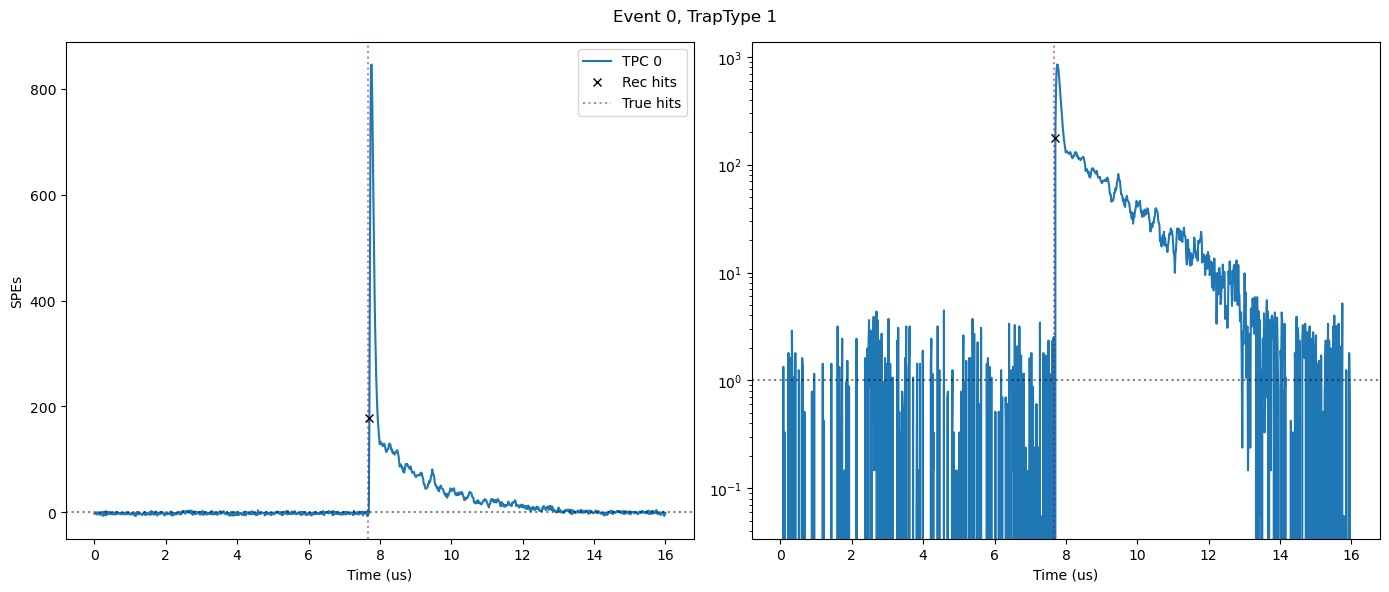

In [ ]:
true_times = []
rec_times = []
true_incl_times = []

for i_evt_lrs in light_wvfm_ref: #[:10]:

    wvfms = []
    hits_where = []
    true_hits_where = []
    true_hits_incl_where = []

    # find the corresponding spill_id for light wvfm ref = i_evt_lrs
    #print(f'light wvfm ref {i_evt_lrs}')
    index = np.where(light_wvfm_ref==i_evt_lrs)[0][0]
    #print(index)
    spill_id_lwr = spill_id[index]
    true_hits_evt = true_hits[(true_hits['event_id'] == spill_id_lwr) & (true_hits['tpc_num'] > -1)]
    if len(true_hits_evt) == 0:
        continue

    for i_tpc in range(0, 4):
        #print(f'Event {i_evt_lrs} has spill_id {spill_id_lwr}')
        true_hits_tpc = true_hits[(true_hits['tpc_num'] == i_tpc) & (true_hits['event_id'] == spill_id_lwr)]
        #true_hits_tpc = true_hits[(true_hits['event_id'] == spill_id_lwr)]
        true_hits_idx = true_hits_tpc['start_time_idx'].values + 100
        if len(true_hits_idx) == 0:
            continue

        i_mask = 2*i_tpc + 1 # 2 * TPC + TrapType
        wvfm = summed_wvfms[i_evt_lrs,i_mask]
        median = np.median(wvfm)
        mad = np.median(np.abs(wvfm - median))
        mad_threshold = 5*mad
        wvfm_rolled = np.roll(wvfm, n_bins_rolled)
        rolling_average = uniform_filter1d(wvfm_rolled, size=n_bins_rolled)
        sqrt_rolling_average = np.sqrt(np.abs(rolling_average) * pe_weight**2)
        dynamic_threshold = rolling_average + n_sqrt_rt_factor*sqrt_rolling_average
        height = heights[i_evt_lrs,i_mask]

        hit = hits[i_evt_lrs,i_mask]
        hit_where = np.where(hit)[0]

        wvfms.append(wvfm)
        hits_where.append(hit_where)
        true_hits_where.append(true_hits_idx)

    true_hits_tpc = true_hits[(true_hits['tpc_num'] == -1) & (true_hits['event_id'] == spill_id_lwr)]
    #true_hits_tpc = true_hits[(true_hits['event_id'] == spill_id_lwr)]
    true_hits_idx = true_hits_tpc['start_time_idx'].values + 100
    if len(true_hits_idx) == 0:
        continue
    true_hits_incl_where.append(true_hits_idx)

    #print(hits_where)
    #print(true_hits_where)

    true_times.append(true_hits_where)
    rec_times.append(hits_where)
    true_incl_times.append(true_hits_incl_where)

    if i_evt_lrs == 0:
        plot_all_tpc_waveform(wvfms, time_bins, hits_where, i_evt_lrs, i_mask, true_hits_where)

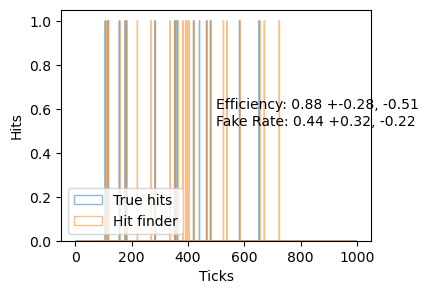

In [ ]:
true_times_list = []
rec_times_list = []

for i in range(len(true_times)):
    for j in range(len(true_times[i][0])):
      true_times_list.append(true_times[i][0][j])
    for j in range(len(rec_times[i][0])):
      rec_times_list.append(rec_times[i][0][j])

true_times_flat = np.array(true_times_list)
rec_times_flat = np.array(rec_times_list)

# for every combination of true and rec times , calculate the residuals
residuals = []
true = 0
rec_true = 0
rec = 0
#true_ext = 0
for i in range(len(true_times)):
    for j in range(len(rec_times[i][0])):
        rec+=1
    for j in range(len(true_times[i][0])):
        true+=1
    #for j in range(len(true_incl_times)):
    #    true_ext+=1
        for k in range(len(rec_times[i][0])):
            # conditions
            time_diff = rec_times[i][0][k] - true_times[i][0][j] < 6
            time_ord = rec_times[i][0][k] - true_times[i][0][j] > 0
            if time_diff and time_ord:
                # check if hit lies between pair
                residuals.append(true_times[i][0][j] - rec_times[i][0][k])
                rec_true+=1
            '''
            # for external to tpcs
            time_diff = rec_times[i][0][k] - true_incl_times[j][0] < 6
            time_ord = rec_times[i][0][k] - true_incl_times[j][0] > 0
            if time_diff and time_ord:
                # check if hit lies between pair
                residuals.append(true_incl_times[j][0] - rec_times[i][0][k])
                rec_true+=1
            '''


efficiency = rec_true/true
d_efficiency = clopper_pearson_interval(rec_true, true)

fake_tate = 1 - rec_true/rec
d_fake_rate = clopper_pearson_interval(rec_true, rec)

#eff_incl =

bins = np.linspace(0, 1001, 1000)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(true_times_flat, bins=bins, histtype='step', label='True hits', alpha=0.5)
ax.hist(rec_times_flat, bins=bins, histtype='step', label='Hit finder', alpha=0.5)
text = f'Efficiency: {efficiency:.2f} +{d_efficiency[1] - efficiency:.2f}, -{efficiency - d_efficiency[0]:.2f}'
text += f'\nFake Rate: {fake_tate:.2f} +{d_fake_rate[1] - fake_tate:.2f}, -{fake_tate - d_fake_rate[0]:.2f}'
ax.text(0.5, 0.5, text, transform=ax.transAxes)
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.show()

Integral between -5 and 0 = 14


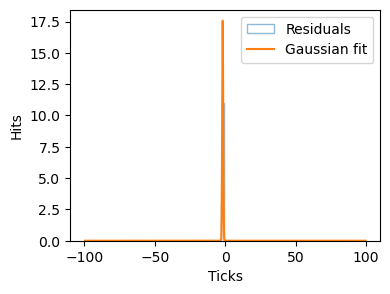

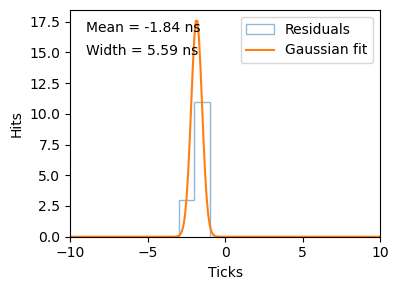

In [ ]:
residuals = np.array(residuals)
# gausssian fit
def gaussian(x, A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
from scipy.optimize import curve_fit

# fit the residuals
bins = np.linspace(-100, 100, 201)
hist, bin_edges = np.histogram(residuals, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# integral of histogram between -5 and 0
integral = np.sum(hist[np.where((bin_centers > -5) & (bin_centers < 0))])
print(f'Integral between -5 and 0 = {integral}')
# set upper and lower bounds for the fit parameter 0 based on integral+-sqrt(integral)
p0 = [integral, -1, 1]
l_lower = integral - np.sqrt(integral)
l_upper = integral + np.sqrt(integral)
bounds = ([l_lower, -10, 0], [l_upper, 0, 10])
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[integral, -1, 1], bounds=bounds)
new_bin_centers = np.linspace(bin_centers[0], bin_centers[-1], 2001)

# plot the residuals
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(residuals, bins=bins, histtype='step', label='Residuals', alpha=0.5)
ax.plot(new_bin_centers, gaussian(new_bin_centers, *popt), label='Gaussian fit')
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.show()

# plot the residuals with a zoom
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(residuals, bins=bins, histtype='step', label='Residuals', alpha=0.5)
ax.plot(new_bin_centers, gaussian(new_bin_centers, *popt), label='Gaussian fit')
# print text of mean of gaussian
text = f'Mean = {popt[1]:.2f} ns'
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=10, verticalalignment='top')
# print text of width of gaussian in ns
text = f'Width = {popt[2]*16:.2f} ns'
ax.text(0.05, 0.85, text, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.tight_layout()
plt.xlim(-10, 10)
plt.show()

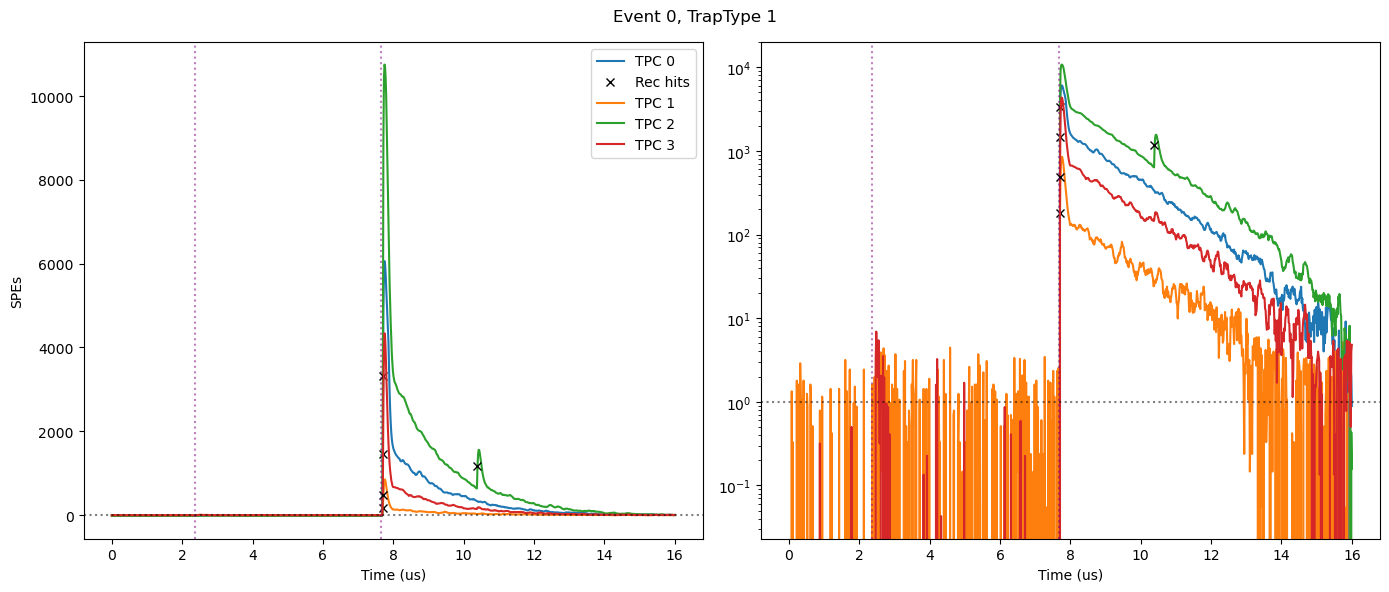

In [ ]:
true_times = []
rec_times = []

for i_evt_lrs in light_wvfm_ref[:20]:

    wvfms = []
    hits_where = []
    true_hits_where = []

    # find the corresponding spill_id for light wvfm ref = i_evt_lrs
    #print(f'light wvfm ref {i_evt_lrs}')
    index = np.where(light_wvfm_ref==i_evt_lrs)[0][0]
    #print(index)
    spill_id_lwr = spill_id[index]
    true_hits_evt = true_hits[(true_hits['event_id'] == spill_id_lwr)]# & (true_hits['tpc_num'] > -1)]
    if len(true_hits_evt) == 0:
        continue
    true_hits_idx = true_hits_evt['start_time_idx'].values + 100

    for i_tpc in range(0, 4):
        #print(f'Event {i_evt_lrs} has spill_id {spill_id_lwr}')
        #true_hits_tpc = true_hits[(true_hits['tpc_num'] == i_tpc) & (true_hits['event_id'] == spill_id_lwr)]
        #true_hits_tpc = true_hits[(true_hits['event_id'] == spill_id_lwr)]
        #true_hits_idx = true_hits_tpc['start_time_idx'].values
        #if len(true_hits_idx) == 0:
        #    continue

        i_mask = 2*i_tpc + 1 # 2 * TPC + TrapType
        wvfm = summed_wvfms[i_evt_lrs,i_mask]
        median = np.median(wvfm)
        mad = np.median(np.abs(wvfm - median))
        mad_threshold = 5*mad
        wvfm_rolled = np.roll(wvfm, n_bins_rolled)
        rolling_average = uniform_filter1d(wvfm_rolled, size=n_bins_rolled)
        sqrt_rolling_average = np.sqrt(np.abs(rolling_average) * pe_weight**2)
        dynamic_threshold = rolling_average + n_sqrt_rt_factor*sqrt_rolling_average
        height = heights[i_evt_lrs,i_mask]

        hit = hits[i_evt_lrs,i_mask]
        hit_where = np.where(hit)[0]

        wvfms.append(wvfm)
        hits_where.append(hit_where)
    true_hits_where.append(true_hits_idx)

    #print(hits_where)
    #print(true_hits_where)

    true_times.append(true_hits_where)
    rec_times.append(hits_where)

    if i_evt_lrs == 0:
        plot_all_tpc_waveform(wvfms, time_bins, hits_where, i_evt_lrs, i_mask, true_hits_idx)

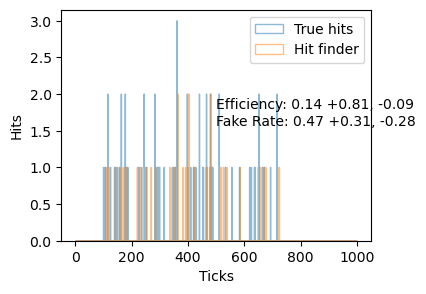

In [ ]:
for i in range(len(true_times)):
    for j in range(len(true_times[i][0])):
      true_times_list.append(true_times[i][0][j])
    for j in range(len(rec_times[i][0])):
      rec_times_list.append(rec_times[i][0][j])

true_times_flat = np.array(true_times_list)
rec_times_flat = np.array(rec_times_list)

# for every combination of true and rec times , calculate the residuals
residuals = []
true = 0
rec_true = 0
rec = 0
for i in range(len(true_times)):
    for j in range(len(rec_times[i][0])):
        rec+=1
    for j in range(len(true_times[i][0])):
        true+=1
        for k in range(len(rec_times[i][0])):
            # conditions
            time_diff = rec_times[i][0][k] - true_times[i][0][j] < 6
            time_ord = rec_times[i][0][k] - true_times[i][0][j] > 0
            if time_diff and time_ord:
                # check if hit lies between pair
                residuals.append(true_times[i][0][j] - rec_times[i][0][k])
                rec_true+=1

efficiency = rec_true/true
d_efficiency = clopper_pearson_interval(rec_true, true)

fake_tate = 1 - rec_true/rec
d_fake_rate = clopper_pearson_interval(rec_true, rec)

bins = np.linspace(0, 1001, 1000)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(true_times_flat, bins=bins, histtype='step', label='True hits', alpha=0.5)
ax.hist(rec_times_flat, bins=bins, histtype='step', label='Hit finder', alpha=0.5)
text = f'Efficiency: {efficiency:.2f} +{d_efficiency[1] - efficiency:.2f}, -{efficiency - d_efficiency[0]:.2f}'
text += f'\nFake Rate: {fake_tate:.2f} +{d_fake_rate[1] - fake_tate:.2f}, -{fake_tate - d_fake_rate[0]:.2f}'
ax.text(0.5, 0.5, text, transform=ax.transAxes)
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.show()

Integral between -5 and 0 = 9


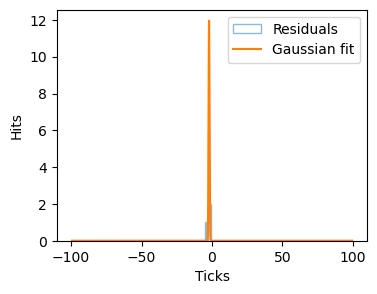

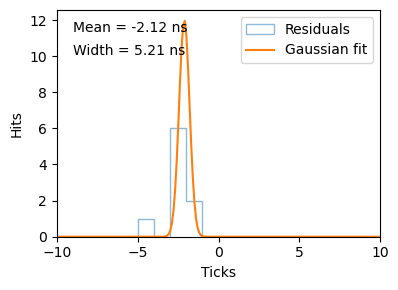

In [ ]:
residuals = np.array(residuals)
# gausssian fit
def gaussian(x, A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
from scipy.optimize import curve_fit

# fit the residuals
bins = np.linspace(-100, 100, 201)
hist, bin_edges = np.histogram(residuals, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# integral of histogram between -5 and 0
integral = np.sum(hist[np.where((bin_centers > -5) & (bin_centers < 0))])
print(f'Integral between -5 and 0 = {integral}')
# set upper and lower bounds for the fit parameter 0 based on integral+-sqrt(integral)
p0 = [integral, -1, 1]
l_lower = integral - np.sqrt(integral)
l_upper = integral + np.sqrt(integral)
bounds = ([l_lower, -10, 0], [l_upper, 0, 10])
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[integral, -1, 1], bounds=bounds)
new_bin_centers = np.linspace(bin_centers[0], bin_centers[-1], 2001)

# plot the residuals
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(residuals, bins=bins, histtype='step', label='Residuals', alpha=0.5)
ax.plot(new_bin_centers, gaussian(new_bin_centers, *popt), label='Gaussian fit')
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.show()

# plot the residuals with a zoom
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(residuals, bins=bins, histtype='step', label='Residuals', alpha=0.5)
ax.plot(new_bin_centers, gaussian(new_bin_centers, *popt), label='Gaussian fit')
# print text of mean of gaussian
text = f'Mean = {popt[1]:.2f} ns'
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=10, verticalalignment='top')
# print text of width of gaussian in ns
text = f'Width = {popt[2]*16:.2f} ns'
ax.text(0.05, 0.85, text, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_xlabel('Ticks')
ax.set_ylabel('Hits')
ax.legend()
plt.tight_layout()
plt.xlim(-10, 10)
plt.show()

Event 0 has spill_id 1, and light wvfm ref 0, and spill id 1


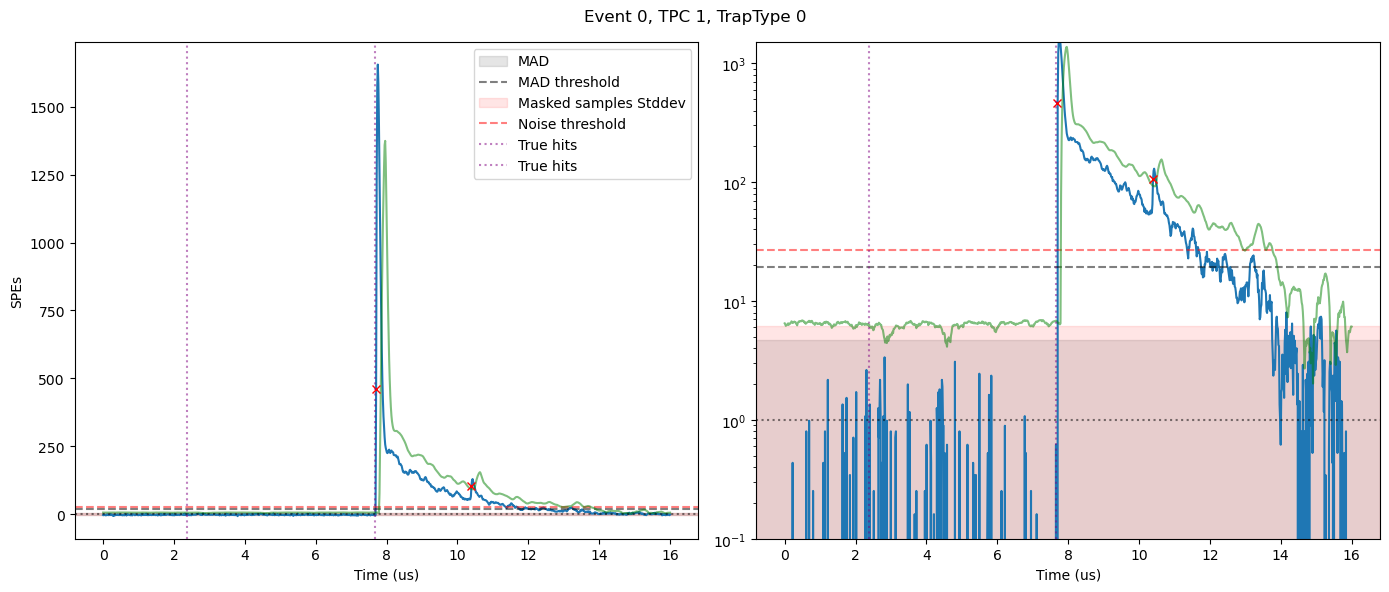

IndexError: index 0 is out of bounds for axis 0 with size 0

In [97]:
# plot the waveform of the trap with the highest wvfm in the event
for i_evt_lrs in range(5):#summed_wvfms.shape[0]):

  # skip events with no hits
  all_traps = summed_wvfms[i_evt_lrs]
  all_heights = heights[i_evt_lrs]
  all_hits = hits[i_evt_lrs]

  # mask with the most hits
  i_mask = np.argmax(all_hits.sum(axis=1))

  # get wvfm, threshold, and hits for the event
  wvfm = summed_wvfms[i_evt_lrs,i_mask]
  median = np.median(wvfm)
  mad = np.median(np.abs(wvfm - median))
  mad_threshold = 5*mad
  wvfm_rolled = np.roll(wvfm, n_bins_rolled)
  rolling_average = uniform_filter1d(wvfm_rolled, size=n_bins_rolled)
  sqrt_rolling_average = np.sqrt(np.abs(rolling_average) * pe_weight**2)
  dynamic_threshold = rolling_average + n_sqrt_rt_factor*sqrt_rolling_average
  height = heights[i_evt_lrs,i_mask]

  hit = hits[i_evt_lrs,i_mask]
  hit_where = np.where(hit)[0]

  if len(hit_where) < 1:
    continue

  # find the corresponding spill_id for light wvfm ref = i_evt_lrs
  index = np.where(light_wvfm_ref==i_evt_lrs)[0][0]
  spill_id_lwr = spill_id[index]

  # print event number, spill_id, and light wvfm ref etc
  print(f'Event {i_evt_lrs} has spill_id {spill_id_lwr}, and light wvfm ref {light_wvfm_ref[index]}, and spill id {spill_id_lwr}')

  # get true hits for the event
  true_hits_evt = true_hits[(true_hits['event_id'] == spill_id_lwr)]
  true_hits_idx = true_hits_evt['start_time_idx'].values + 100

  plot_waveform(wvfm, time_bins, height, mad, 5.0, dynamic_threshold, hit_where, n_noise_factor, i_evt_lrs, i_mask, true_hits_idx)
  #break